In [1]:
import pandas as pd 
import numpy as np
from matplotlib.ticker import FuncFormatter
import matplotlib.pyplot as plt
from scipy.stats import linregress
from sklearn import linear_model

In [2]:
#Retrieve Dataframes
average_rate=pd.read_csv("Resources/Cleaned_Dataframes/average_rate.csv")
college=pd.read_csv("Resources/Cleaned_Dataframes/college.csv")
nfl_stats_df=pd.read_csv("Resources/Cleaned_Dataframes/nfl_stats_df.csv") 
percent_nfl_stats_df=pd.read_csv("Resources/Cleaned_Dataframes/percent_nfl_stats_df.csv")
ratings_by_draft=pd.read_csv("Resources/Cleaned_Dataframes/ratings_by_draft.csv")
salary=pd.read_csv("Resources/Cleaned_Dataframes/salary_df.csv")
pick_stats=pd.read_csv("Resources/Cleaned_Dataframes/pick_stats.csv")
mayfield_df=pd.read_csv("Resources/Cleaned_Dataframes/mayfield_df.csv")

In [3]:
#Use official Browns colors
orange="#FF3C00"
brown="#311D00"

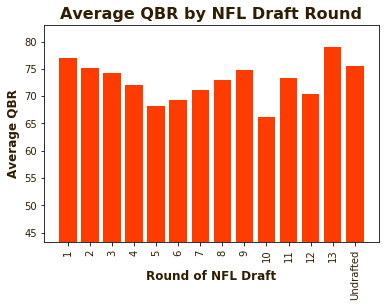

In [4]:
plt.bar(average_rate["Draft"], average_rate["Rate"], color=orange,align="center")
plt.title("Average QBR by NFL Draft Round", fontsize=16,fontweight="bold",color=brown)
plt.xlabel("Round of NFL Draft",fontsize=12,fontweight="bold",color=brown,labelpad=-30)
plt.ylabel("Average QBR",fontsize=12,fontweight="bold",color=brown)
plt.xticks(np.arange(1,15),[1,2,3,4,5,6,7,8,9,10,11,12,13,"Undrafted"],rotation="vertical",color=brown)
plt.yticks(color=brown)
plt.ylim(nfl_stats_df['Rate'].min())
plt.savefig("Images/QBR_by_Draft_Round.png")
plt.show()
plt.close()

## The NFL Draft has only had seven rounds since 1994. In 1977, it was reduced to twelve rounds. Only one 13th round pick was still active in 1983 when our dataset begins: Browns 'Cardiac Kids' QB Brian Sipe.

In [5]:
nfl_stats_df.loc[nfl_stats_df['Draft']==13]

,Player,From,To,Draft,Height (in),G,GS,Cmp,Att,Cmp%,...,Int,Rate,Y/A,Y/G,W,L,T,Yrs,Pro Bowls,Win Record
275,Brian Sipe,1983,1983,13.0,73,15,14,291,496,58.67,...,23,79.1,7.19,237.7,8.0,6.0,0.0,1,0,0.571429


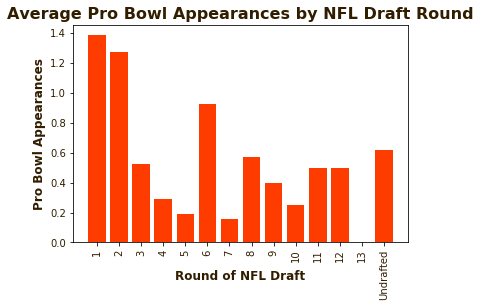

In [6]:
#Pro Bowl PLot
grpby_probowl = percent_nfl_stats_df.groupby("Draft", as_index=False)
average_probowl = pd.DataFrame(grpby_probowl ["Pro Bowls"].mean())
plt.bar(average_probowl["Draft"], average_probowl["Pro Bowls"], color=orange,align="center")
plt.title("Average Pro Bowl Appearances by NFL Draft Round", fontsize=16, fontweight="bold",color=brown)
plt.xlabel("Round of NFL Draft",fontsize=12,fontweight="bold",color=brown,labelpad=-30)
plt.ylabel("Pro Bowl Appearances",fontsize=12,fontweight="bold",color=brown)
plt.xticks(np.arange(1,15),[1,2,3,4,5,6,7,8,9,10,11,12,13,"Undrafted"],rotation="vertical",color=brown)
plt.yticks(color=brown)
plt.savefig("Images/ProBowl_by_Draft_Round.png")
plt.show()
plt.close()

## The high number for sixth round picks is due entirely to one outlier: Patriots QB Tom Brady. With 13 Pro Bowl appearances, Brady is second only to Peyton Manning in our dataset.

In [7]:
nfl_stats_df.loc[nfl_stats_df['Player']=="Tom Brady"]

,Player,From,To,Draft,Height (in),G,GS,Cmp,Att,Cmp%,...,Int,Rate,Y/A,Y/G,W,L,T,Yrs,Pro Bowls,Win Record
1,Tom Brady,2000,2018,6.0,76,253,251,5629,8805,63.93,...,160,97.6,7.51,261.5,196.0,55.0,0.0,19,13,0.780876


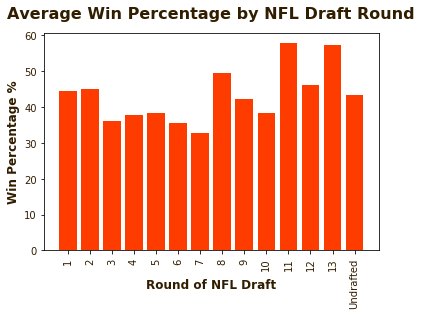

In [8]:
#Group by Win Record
grpby_win_record = percent_nfl_stats_df.groupby("Draft", as_index=False)
average_win_record = pd.DataFrame(grpby_win_record ["Win Record"].mean())
plt.bar(average_win_record["Draft"], average_win_record["Win Record"], color=orange,align="center")
plt.title("Average Win Percentage by NFL Draft Round", fontsize=16, fontweight="bold",color=brown, y=1.04)
plt.xlabel("Round of NFL Draft",fontsize=12,fontweight="bold",color=brown,labelpad=-30)
plt.ylabel("Win Percentage %",fontsize=12,fontweight="bold",color=brown)
plt.xticks(np.arange(1,15),[1,2,3,4,5,6,7,8,9,10,11,12,13,"Undrafted"],rotation="vertical",color=brown)
plt.yticks(color=brown)
plt.savefig("Images/Win_by_DraftRound.png")
plt.show()
plt.close()

In [9]:
# Quarter by Height Bins 
height_bins = [0, 73, 75, 77, 82]
group_names = ["under 73 Inches", "73-75 Inches", "75-77 Inches", "over 77 Inches"]

nfl_stats_df["Height Range"] = pd.cut(nfl_stats_df["Height (in)"], height_bins, labels = group_names)

total_players = nfl_stats_df.groupby("Height Range")["Player"].count()
average_win_loss_record = nfl_stats_df.groupby("Height Range")["Win Record"].mean()
average_pro_bowl_appearance = nfl_stats_df.groupby("Height Range")["Pro Bowls"].mean()
total_pro_bowl_appearance = nfl_stats_df.groupby("Height Range")["Pro Bowls"].sum()
average_rating = nfl_stats_df.groupby("Height Range")["Rate"].mean()
average_record = nfl_stats_df.groupby("Height Range")["Win Record"].mean()
average_draft_spot = nfl_stats_df.groupby("Height Range")["Draft"].mean()

qb_by_height = pd.DataFrame({"Total Players": total_players,
                            "Avg Game Record": average_win_loss_record,
                             "Total Pro Bowls": total_pro_bowl_appearance,
                            "Avg Pro Bowl Appearances":average_pro_bowl_appearance,
                            "Average Passer Rating": average_rating,
                            "Average W/L Record": average_record, 
                            "Average Draft Spot":average_draft_spot})

qb_by_height["Average W/L Record"] = qb_by_height["Average W/L Record"].astype(float)
qb_by_height["Average W/L Record"] = qb_by_height["Average W/L Record"]*100
#qb_by_height["Average W/L Record"] = qb_by_height["Average W/L Record"].map("{:.2f}%".format)


qb_by_height= qb_by_height.reset_index()


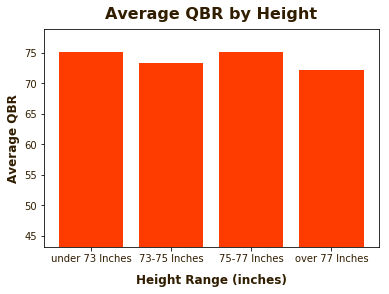

In [10]:
plt.bar(qb_by_height ["Height Range"],qb_by_height["Average Passer Rating"], color=orange,align="center")
plt.title("Average QBR by Height", fontsize=16, fontweight="bold",color=brown,y=1.02)
plt.xlabel("Height Range (inches)",fontsize=12,fontweight="bold",color=brown,labelpad=10)
plt.ylabel("Average QBR",fontsize=12,fontweight="bold",color=brown)
plt.xticks([0,1,2,3],color=brown)
plt.yticks(color=brown)
plt.ylim(nfl_stats_df['Rate'].min())
plt.savefig("Images/QBR_by_HeightRange.png")
plt.show()
plt.close()

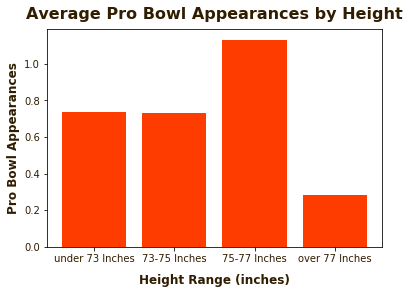

In [11]:
plt.bar(qb_by_height ["Height Range"],qb_by_height["Avg Pro Bowl Appearances"], color=orange,align="center")
plt.title("Average Pro Bowl Appearances by Height", fontsize=16, fontweight="bold",color=brown,y=1.02)
plt.xlabel("Height Range (inches)",fontsize=12,fontweight="bold",color=brown,labelpad=10)
plt.ylabel("Pro Bowl Appearances",fontsize=12,fontweight="bold",color=brown)
plt.xticks([0,1,2,3],color=brown)
plt.yticks(color=brown)
plt.savefig("Images/ProBowl_by_HeightRange.png")
plt.show()
plt.close()

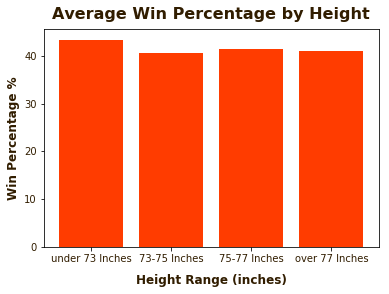

In [12]:
plt.bar(qb_by_height ["Height Range"],qb_by_height["Average W/L Record"], color=orange,align="center")
plt.title("Average Win Percentage by Height", fontsize=16, fontweight="bold",color=brown,y=1.02)
plt.xlabel("Height Range (inches)",fontsize=12,fontweight="bold",color=brown,labelpad=10)
plt.ylabel("Win Percentage %",fontsize=12,fontweight="bold",color=brown)
plt.xticks([0,1,2,3],color=brown)
plt.yticks(color=brown)
plt.savefig("Images/Win_by_HeightRange.png")
plt.show()
plt.close()

In [13]:
#Bin NFL Stats by College Passer Rating
NFL_Col=pd.DataFrame.merge(college,nfl_stats_df,on="Player")
rate_bins = [0,130,145,160,175,200]
rate_names = ["<130", "130-145", "145-160", "160-175",">175"]
colbin=NFL_Col.copy()
colbin['rate bin'] = pd.cut(colbin['College Rating'], rate_bins,labels=rate_names)
bins_total = colbin.groupby("rate bin")["Player"].count()
bins_win=colbin.groupby("rate bin")["Win Record"].mean()
bins_bowl=colbin.groupby("rate bin")["Pro Bowls"].mean()
bins_qbr=colbin.groupby("rate bin")["Rate"].mean()
college_bins=pd.DataFrame({"Total Players":bins_total,"Average QBR":bins_qbr,"Average Win Percentage":bins_win,"Average Pro Bowls":bins_bowl})
college_bins=college_bins.reset_index()


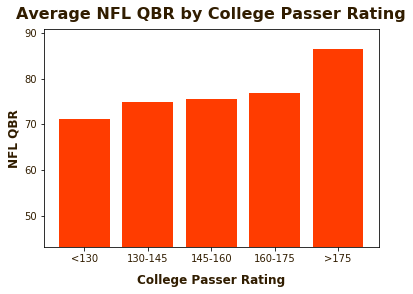

In [14]:
plt.bar(college_bins["rate bin"],college_bins["Average QBR"], color=orange,align="center")
plt.title("Average NFL QBR by College Passer Rating", fontsize=16, fontweight="bold",color=brown,y=1.02)
plt.xlabel("College Passer Rating",fontsize=12,fontweight="bold",color=brown,labelpad=10)
plt.ylabel("NFL QBR",fontsize=12,fontweight="bold",color=brown)
plt.xticks([0,1,2,3,4],color=brown)
plt.yticks(color=brown)
plt.savefig("Images/QBR_by_College.png")
plt.ylim(nfl_stats_df['Rate'].min())
plt.show()
plt.close()

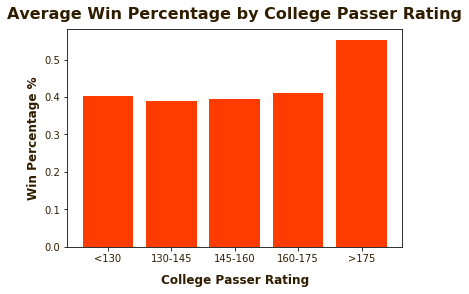

In [15]:
plt.bar(college_bins["rate bin"],college_bins["Average Win Percentage"], color=orange,align="center")
plt.title("Average Win Percentage by College Passer Rating", fontsize=16, fontweight="bold",color=brown,y=1.02)
plt.xlabel("College Passer Rating",fontsize=12,fontweight="bold",color=brown,labelpad=10)
plt.ylabel("Win Percentage %",fontsize=12,fontweight="bold",color=brown)
plt.xticks([0,1,2,3,4],color=brown)
plt.yticks(color=brown)
plt.savefig("Images/Win_by_College.png")
plt.show()
plt.close()

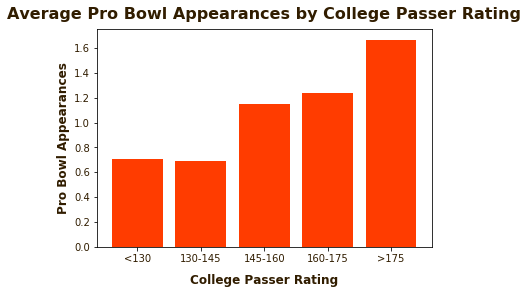

In [16]:
plt.bar(college_bins["rate bin"],college_bins["Average Pro Bowls"], color=orange,align="center")
plt.title("Average Pro Bowl Appearances by College Passer Rating", fontsize=16, fontweight="bold",color=brown,y=1.02)
plt.xlabel("College Passer Rating",fontsize=12,fontweight="bold",color=brown,labelpad=10)
plt.ylabel("Pro Bowl Appearances",fontsize=12,fontweight="bold",color=brown)
plt.xticks([0,1,2,3,4],color=brown)
plt.yticks(color=brown)
plt.savefig("Images/ProBowl_by_College.png")
plt.show()
plt.close()

In [17]:
#Linear regression on College Passer Rating and NFL QBR
(slope, intercept,r,p,err) = linregress(NFL_Col['College Rating'],NFL_Col['Rate'])
reg1=slope*NFL_Col['College Rating']+intercept
r2=r**2

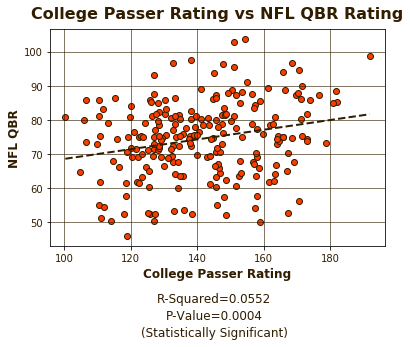

In [18]:
plt.scatter(NFL_Col['College Rating'],NFL_Col['Rate'],color=orange,edgecolors=brown)
plt.title("College Passer Rating vs NFL QBR Rating",fontsize=16, fontweight="bold",color=brown,y=1.02)
plt.xlabel("College Passer Rating",fontsize=12,fontweight="bold",color=brown)
plt.ylabel("NFL QBR",fontsize=12,fontweight="bold",color=brown)
plt.grid(color=brown,alpha=.75)
x_line=np.arange(NFL_Col['College Rating'].min(),NFL_Col['College Rating'].max(),0.1)
y_line=slope * x_line + intercept
plt.plot(x_line,y_line, 'b--',color=brown,linewidth=2.0)
#plt.savefig("temperature.png")
plt.text(145,27.5,"R-Squared="+str(round(r2,4)),horizontalalignment='center',verticalalignment='center',fontsize="12",color=brown)
plt.text(145,22.5,"P-Value="+str(round(p,4)),horizontalalignment='center',verticalalignment='center',fontsize="12",color=brown)
plt.text(145,17.5,"(Statistically Significant)",horizontalalignment='center',verticalalignment='center',fontsize="12",color=brown)
plt.xticks(color=brown)
plt.yticks(color=brown)
plt.savefig("Images/QBR_vs_College.png")
plt.show()
plt.close()

In [19]:
##Linear regression on College Passer Rating and NFL Win Percentage
(slope,intercept,rv,pv,er) = linregress(NFL_Col['College Rating'],NFL_Col['Win Record'])
rsqr=rv**2

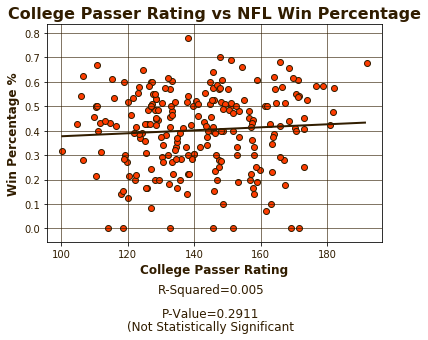

In [20]:
plt.scatter(NFL_Col['College Rating'],NFL_Col['Win Record'],color=orange,edgecolors=brown)
plt.title("College Passer Rating vs NFL Win Percentage",fontsize=16, fontweight="bold",color=brown)
plt.xlabel("College Passer Rating",fontsize=12, fontweight="bold",color=brown)
plt.ylabel("Win Percentage %",fontsize=12, fontweight="bold",color=brown)
plt.grid(color=brown,alpha=.75)
#plt.savefig("temperature.png")
plt.text(145,-0.25,"R-Squared="+str(round(rsqr,4)),horizontalalignment='center',verticalalignment='center',fontsize=12,color=brown)
plt.text(145,-0.35,"P-Value="+str(round(pv,4)),horizontalalignment='center',verticalalignment='center',fontsize=12,color=brown)
plt.text(145,-.4,"(Not Statistically Significant",horizontalalignment='center',verticalalignment='center',fontsize=12,color=brown)
line_x=np.arange(NFL_Col['College Rating'].min(), NFL_Col['College Rating'].max())
line_y = slope*line_x + intercept
plt.plot(line_x, line_y,linewidth=2.0,color=brown)
plt.xticks(color=brown)
plt.yticks(color=brown)
plt.savefig("Images/Win_vs_College.png")
plt.show()
plt.close()

In [21]:
#Linear regression on College Passer Rating and NFL Salary
salary_col=pd.merge(college,salary,on="Player")
(slope,intercept,rv,pv,er) = linregress(salary_col['College Rating'],salary_col['Salary']/1000000)
rsqr=rv**2

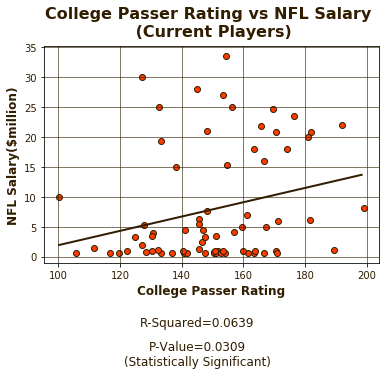

In [22]:
plt.scatter(salary_col['College Rating'],salary_col['Salary']/1000000,color=orange,edgecolors=brown)
plt.title("College Passer Rating vs NFL Salary \n (Current Players)",fontsize=16, fontweight="bold",color=brown,y=1.02)
plt.xlabel("College Passer Rating",fontsize=12, fontweight="bold",color=brown)
plt.ylabel("NFL Salary($million)",fontsize=12, fontweight="bold",color=brown)
plt.grid(color=brown,alpha=.75)
#plt.savefig("temperature.png")
plt.text(145,-11,"R-Squared="+str(round(rsqr,4)),horizontalalignment='center',verticalalignment='center',fontsize=12,color=brown)
plt.text(145,-15,"P-Value="+str(round(pv,4)),horizontalalignment='center',verticalalignment='center',fontsize=12,color=brown)
plt.text(145,-17.5,"(Statistically Significant)",horizontalalignment='center',verticalalignment='center',fontsize="12",color=brown)
line_x=np.arange(salary_col['College Rating'].min(), salary_col['College Rating'].max())
line_y = slope*line_x + intercept
plt.plot(line_x, line_y,linewidth=2.0,color=brown)
plt.xticks(color=brown)
plt.yticks(color=brown)
plt.savefig("Images/Salary_vs_College.png")
plt.show()
plt.close()

In [23]:
#Linear regression on Height and NFL QBR
(slope,intercept,rv,pv,er) = linregress(nfl_stats_df['Height (in)'],nfl_stats_df['Rate'])
rsqr=rv**2

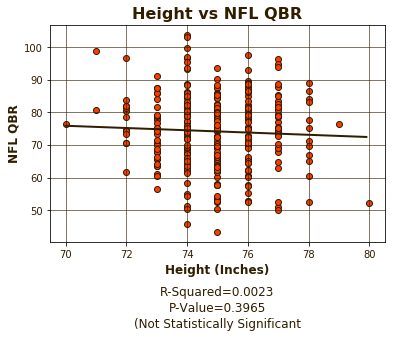

In [24]:
plt.scatter(nfl_stats_df['Height (in)'],nfl_stats_df['Rate'],color=orange,edgecolors=brown)
plt.title("Height vs NFL QBR",fontsize=16, fontweight="bold",color=brown)
plt.xlabel("Height (Inches)",fontsize=12, fontweight="bold",color=brown)
plt.ylabel("NFL QBR",fontsize=12, fontweight="bold",color=brown)
plt.grid(color=brown,alpha=.75)
#plt.savefig("temperature.png")
plt.text(75,25,"R-Squared="+str(round(rsqr,4)),horizontalalignment='center',verticalalignment='center',fontsize=12,color=brown)
plt.text(75,20,"P-Value="+str(round(pv,4)),horizontalalignment='center',verticalalignment='center',fontsize=12,color=brown)
plt.text(75,15,"(Not Statistically Significant",horizontalalignment='center',verticalalignment='center',fontsize=12,color=brown)
line_x=np.arange(nfl_stats_df['Height (in)'].min(), nfl_stats_df['Height (in)'].max(),0.1)
line_y = slope*line_x + intercept
plt.xticks(color=brown)
plt.yticks(color=brown)
plt.plot(line_x, line_y,linewidth=2.0,color=brown)
plt.savefig("Images/QBR_vs_Height.png")
plt.show()
plt.close()

In [25]:
#Linear regression on Height and NFL Win Percentage
(slope,intercept,rv,pv,er) = linregress(nfl_stats_df['Height (in)'],nfl_stats_df['Win Record'])
rsqr=rv**2

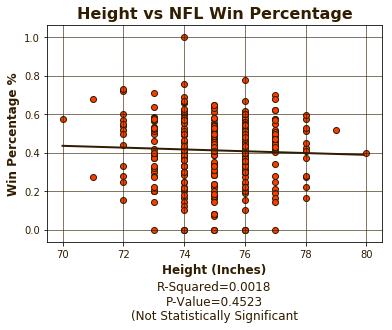

In [26]:
plt.scatter(nfl_stats_df['Height (in)'],nfl_stats_df['Win Record'],color=orange,edgecolors=brown)
plt.title("Height vs NFL Win Percentage",fontsize=16, fontweight="bold",color=brown)
plt.xlabel("Height (Inches)",fontsize=12, fontweight="bold",color=brown)
plt.ylabel("Win Percentage %",fontsize=12, fontweight="bold",color=brown)
plt.grid(color=brown,alpha=.75)
#plt.savefig("temperature.png")
plt.text(75,-.3,"R-Squared="+str(round(rsqr,4)),horizontalalignment='center',verticalalignment='center',fontsize=12,color=brown)
plt.text(75,-.375,"P-Value="+str(round(pv,4)),horizontalalignment='center',verticalalignment='center',fontsize=12,color=brown)
plt.text(75,-.45,"(Not Statistically Significant",horizontalalignment='center',verticalalignment='center',fontsize=12,color=brown)
line_x=np.arange(nfl_stats_df['Height (in)'].min(), nfl_stats_df['Height (in)'].max(),0.1)
line_y = slope*line_x + intercept
plt.plot(line_x, line_y,linewidth=2.0,color=brown)
plt.xticks(color=brown)
plt.yticks(color=brown)
plt.savefig("Images/Win_vs_Height.png")
plt.show()
plt.close()

In [27]:
hsal=pd.merge(salary_col,nfl_stats_df,on="Player")
(slope,intercept,rv,pv,er) = linregress(hsal['Height (in)'],hsal['Salary']/1000000)
rsqr=rv**2

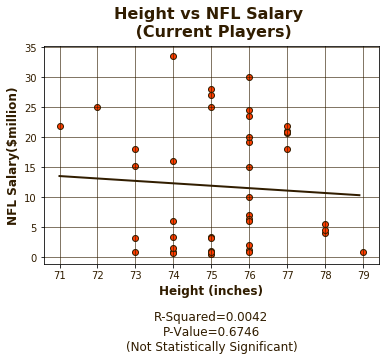

In [28]:
plt.scatter(hsal['Height (in)'],hsal['Salary']/1000000,color=orange,edgecolors=brown)
plt.title("Height vs NFL Salary \n (Current Players)",fontsize=16, fontweight="bold",color=brown,y=1.02)
plt.xlabel("Height (inches)",fontsize=12, fontweight="bold",color=brown)
plt.ylabel("NFL Salary($million)",fontsize=12, fontweight="bold",color=brown)
plt.grid(color=brown,alpha=.75)
#plt.savefig("temperature.png")
plt.text(75,-10,"R-Squared="+str(round(rsqr,4)),horizontalalignment='center',verticalalignment='center',fontsize=12,color=brown)
plt.text(75,-12.5,"P-Value="+str(round(pv,4)),horizontalalignment='center',verticalalignment='center',fontsize=12,color=brown)
plt.text(75,-15,"(Not Statistically Significant)",horizontalalignment='center',verticalalignment='center',fontsize="12",color=brown)
line_x=np.arange(hsal['Height (in)'].min(), hsal['Height (in)'].max(),0.1)
line_y = slope*line_x + intercept
plt.xticks(color=brown)
plt.yticks(color=brown)
plt.plot(line_x, line_y,linewidth=2.0,color=brown)
plt.savefig("Images/Salary_vs_Height.png")
plt.show()
plt.close()

In [29]:
#Linear regression on Draft Position and NFL QBR

(slope,intercept,rv,pv,er) = linregress(pick_stats['Pick'],pick_stats['Rate'])
rsqr=rv**2
reg2=slope*pick_stats['Pick']+intercept

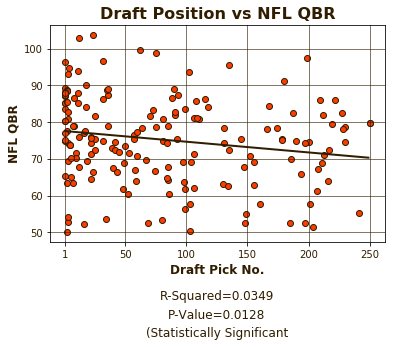

In [30]:
plt.scatter(pick_stats['Pick'],pick_stats['Rate'],color=orange,edgecolors=brown)
plt.title("Draft Position vs NFL QBR",fontsize=16, fontweight="bold",color=brown)
plt.xlabel("Draft Pick No.",fontsize=12, fontweight="bold",color=brown)
plt.ylabel("NFL QBR",fontsize=12, fontweight="bold",color=brown)
plt.grid(color=brown,alpha=.75)
#plt.savefig("temperature.png")
plt.text(125,32.5,"R-Squared="+str(round(rsqr,4)),horizontalalignment='center',verticalalignment='center',fontsize=12,color=brown)
plt.text(125,27.5,"P-Value="+str(round(pv,4)),horizontalalignment='center',verticalalignment='center',fontsize=12,color=brown)
plt.text(125,22.5,"(Statistically Significant",horizontalalignment='center',verticalalignment='center',fontsize=12,color=brown)
line_x=np.arange(1, pick_stats['Pick'].max())
line_y = slope*line_x + intercept
plt.plot(line_x, line_y,linewidth=2.0,color=brown)
plt.xticks([1,50,100,150,200,250],color=brown)
plt.yticks(color=brown)
plt.savefig("Images/QBR_vs_Draft.png")
plt.show()
plt.close()

In [31]:
#Linear regression on Draft Position and NFL QBR

(slope,intercept,rv,pv,er) = linregress(pick_stats['Pick'],pick_stats['Win Record'])
rsqr=rv**2

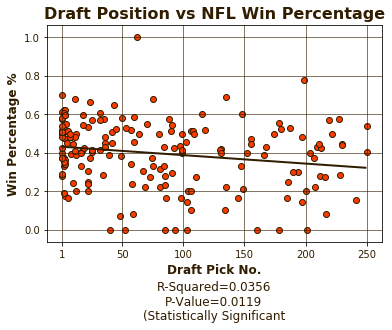

In [32]:
plt.scatter(pick_stats['Pick'],pick_stats['Win Record'],color=orange,edgecolors=brown)
plt.title("Draft Position vs NFL Win Percentage",fontsize=16, fontweight="bold",color=brown)
plt.xlabel("Draft Pick No.",fontsize=12, fontweight="bold",color=brown)
plt.ylabel("Win Percentage %",fontsize=12, fontweight="bold",color=brown)
plt.grid(color=brown,alpha=.75)
#plt.savefig("temperature.png")
plt.text(125,-.3,"R-Squared="+str(round(rsqr,4)),horizontalalignment='center',verticalalignment='center',fontsize=12,color=brown)
plt.text(125,-.375,"P-Value="+str(round(pv,4)),horizontalalignment='center',verticalalignment='center',fontsize=12,color=brown)
plt.text(125,-.45,"(Statistically Significant",horizontalalignment='center',verticalalignment='center',fontsize=12,color=brown)
line_x=np.arange(1, pick_stats['Pick'].max())
line_y = slope*line_x + intercept
plt.plot(line_x, line_y,linewidth=2.0,color=brown)
plt.xticks([1,50,100,150,200,250],color=brown)
plt.yticks(color=brown)
plt.savefig("Images/Win_vs_Draft.png")
plt.show()
plt.close()

In [33]:
dsal=pd.merge(salary_col,pick_stats,on="Player")
dsal=dsal[dsal['Pick']<=224]
(slope,intercept,rv,pv,er) = linregress(dsal['Pick'],dsal['Salary']/1000000)
rsqr=rv**2

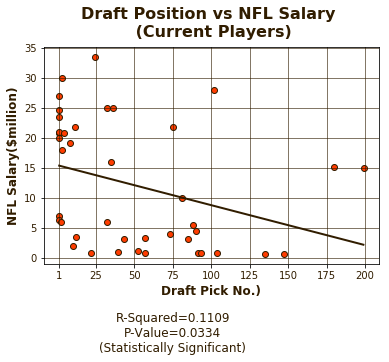

In [34]:
plt.scatter(dsal['Pick'],dsal['Salary']/1000000,color=orange,edgecolors=brown)
plt.title("Draft Position vs NFL Salary \n (Current Players)",fontsize=16, fontweight="bold",color=brown,y=1.02)
plt.xlabel("Draft Pick No.)",fontsize=12, fontweight="bold",color=brown)
plt.ylabel("NFL Salary($million)",fontsize=12, fontweight="bold",color=brown)
plt.grid(color=brown,alpha=.75)
#plt.savefig("temperature.png")
plt.text(75,-10,"R-Squared="+str(round(rsqr,4)),horizontalalignment='center',verticalalignment='center',fontsize=12,color=brown)
plt.text(75,-12.5,"P-Value="+str(round(pv,4)),horizontalalignment='center',verticalalignment='center',fontsize=12,color=brown)
plt.text(75,-15,"(Statistically Significant)",horizontalalignment='center',verticalalignment='center',fontsize="12",color=brown)
line_x=np.arange(dsal['Pick'].min(), dsal['Pick'].max(),0.1)
line_y = slope*line_x + intercept
plt.xticks([1,25,50,75,100,125,150,175,200],color=brown)
plt.yticks(color=brown)
plt.plot(line_x, line_y,linewidth=2.0,color=brown)
plt.savefig("Images/Salary_vs_Draft.png")
plt.show()
plt.close()

In [35]:
col_pick=pd.merge(college,pick_stats,on="Player")


In [36]:
data=pd.DataFrame({"College Rating":col_pick['College Rating'],"Pick":col_pick['Pick']})

In [37]:
target=col_pick['Rate']

In [38]:
X=data
y=target

In [39]:
#Create college stat regression model
lm = linear_model.LinearRegression()
lm.fit(X,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [40]:
bake=pd.DataFrame({"College Rating":[198.89],"Pick":[1]})

In [41]:
college.loc[college['Player']=="Baker Mayfield"]

,Player,College Rating,yards_attempt,yards_adjusted
98,Baker Mayfield,198.9,11.5,12.9


In [42]:
Baker=pd.DataFrame({"College Rating":[198.9],"Pick":[1]})

In [43]:
Predicted_QBR=lm.predict(Baker)

In [44]:
Predicted_QBR[0]

82.56214208249273

## Based on his college passer rating and draft position, our model predicts Baker Mayfield to have an NFL QBR of 82.6

In [45]:
Baker_Mayfield=pd.merge(college,mayfield_df,left_on="Player",right_on="name")
Baker_Mayfield=Baker_Mayfield.set_index("Player")
del Baker_Mayfield['name']
Baker_Mayfield=Baker_Mayfield.rename(columns = {'QBR':'College QBR',"name":"Player","yards_attempt":"Yards per Attempt","yards_adjusted":"Yards Per Attempt \n (Adjusted"})
Baker_Mayfield['Predicted QBR']=Predicted_QBR
Baker_Mayfield

,College Rating,Yards per Attempt,Yards Per Attempt (Adjusted,Draft,height (inches),att,comp,yards,TD,INT,College QBR,Wins,Loss,W/L Record,Predicted QBR
Player,,,,,,,,,,,,,,,
Baker Mayfield,198.9,11.5,12.9,1,73,404,285,4627,43,6,137.881601,12,2,0.857,82.562142
